In [1]:
import seaborn as sns
import pandas as pd
import urllib.request
import random
import matplotlib.pyplot as plt

In [2]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [3]:
def readNPDBFiles(path, n):
    file = open(path, "r")
    lines = file.readlines()
    pdbs = [(line.strip()[:4], line.strip()[4:5]) for line in lines[1:]]
    random.shuffle(pdbs)
    return pdbs[1:n]

In [4]:
def getPDBFile(pdb):
        try:
            url = "https://files.rcsb.org/view/{}.pdb".format(pdb)
            response = urllib.request.urlopen(url)
            data = response.read()
            text = data.decode('utf-8')
            text = text.split('\n')
            return(text)
        except:
            return([])

In [5]:
def getNPDBFileNames(path, n):
    file = open(path, "r")
    lines = file.readlines()
    pdbCodes = [line[:4] for line in lines[2:]]
    random.shuffle(pdbCodes)
    return pdbCodes[0:n]

In [6]:
def AnalyzePDB_Q3(pdbs):
    freq = {}
    processed = 1
    for pdb in pdbs:
        update_progress(processed / len(pdbs))
        print("Processing {}/{}".format(processed, len(pdbs)))
        lines = getPDBFile(pdb[0])
        helixLines = [line for line in lines if line.startswith("HELIX")]
        for idx, helix, in enumerate(helixLines):
            if(helix[19].strip() == pdb[1]):
                helixClass = helix[39:40].strip()
                helixLength = float(helix[72:76].strip())
            
                if helixClass not in freq:
                    freq[helixClass] = []
                    freq[helixClass].append(helixLength)
                else:
                    freq[helixClass].append(helixLength)
        processed+=1
    return freq

In [7]:
%%time
pdbs = readNPDBFiles("cullpdb_pc30_res3.0_R1.0_d191017_chains18877", 18877) #18877
freq = AnalyzePDB_Q3(pdbs)

Progress: [####################] 100.0%
Processing 18876/18876
CPU times: user 4min 22s, sys: 1min 5s, total: 5min 28s
Wall time: 9h 47min 29s


[None, None, None, None]

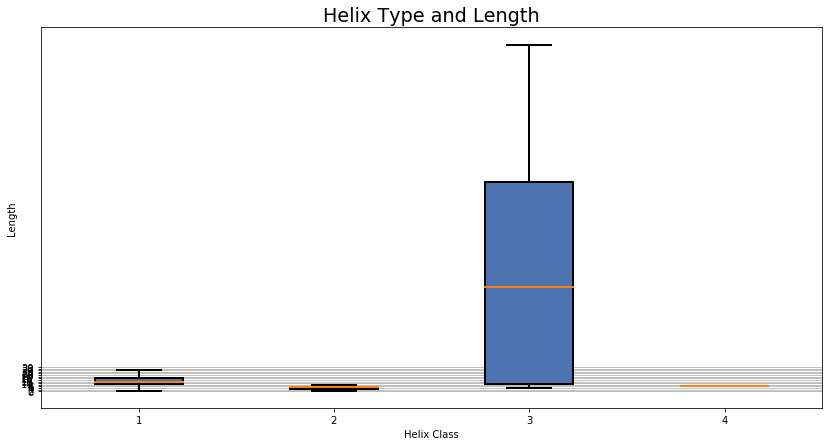

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)

plotList = [freq[entry] for entry in freq]
box = ax.boxplot(plotList, showfliers=False, patch_artist=True)

#Set font size
plt.rcParams.update({'font.size': 16})

#Set Box Color
for patch in box['boxes']:
        patch.set(facecolor="#4C72B0") 

#Set labels
ax.set_title('Helix Type and Length')
labels = [item.get_text() for item in ax.get_xticklabels()]
#labels[0] = "Right-handed alpha"
#labels[1] = "Right-handed omega"
#labels[2] = "Right-handed pi"
ax.set_xticklabels(labels)
ax.set_yticks(range(0,31, 2))
ax.set_xlabel("Helix Class")
ax.set_ylabel("Length")

#Set show yaxis grid
ax.yaxis.grid(True)

#Set Line Thickness
plt.setp(box['whiskers'], color='k', linestyle='-', linewidth=2)
plt.setp(box['caps'], color='k', linestyle='-', linewidth=2)
plt.setp(box['medians'], linewidth=2)
plt.setp(box['boxes'], linewidth=2)

#fig.savefig('images/Section3Boxplot.png', format='png', dpi=1200)